# 🔢 Modelos con Múltiples Parámetros de Entrada
##  

---

## 🏗️ Configuración Inicial

In [1]:
# Importación de librerías esenciales para análisis de datos y machine learning
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Configuración de estilos para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Eliminamos las advertencias para una salida más limpia
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías cargadas correctamente")

✅ Librerías cargadas correctamente


---

## 1. 🆕 ¿QUÉ CAMBIA CON MÚLTIPLES PARÁMETROS?

### 🤔 De 1 parámetro a MÚLTIPLES parámetros

#### ESCENARIO SIMPLE (1 parámetro):

**Predecir precio de casa basado solo en:**
- Tamaño (m²)

#### ESCENARIO REAL (múltiples parámetros):

**Predecir precio de casa basado en:**
- Tamaño (m²)
- Número de habitaciones
- Años de antigüedad
- Barrio
- ¿Tiene garage?
- ¿Tiene piscina?

In [2]:
# Crear dataset realista con múltiples parámetros

np.random.seed(42) # Para reproducibilidad
n_muestras = 500 # Número de muestras

datos = pd.DataFrame({
    'tamaño': np.random.normal(120, 40, n_muestras), # Tamaño en metros cuadrados
    'habitaciones': np.random.randint(1, 6, n_muestras), # Número de habitaciones
    'antiguedad': np.random.randint(0, 50, n_muestras), # Antigüedad en años
    'barrio_cod': np.random.randint(1, 4, n_muestras),  # 3 barrios diferentes
    'tiene_garage': np.random.choice([0, 1], n_muestras, p=[0.3, 0.7]), # Tiene garage (1) o no (0)
    'tiene_piscina': np.random.choice([0, 1], n_muestras, p=[0.7, 0.3]) # Tiene piscina (1) o no (0)
})

# Crear precio basado en una fórmula realista
precio_base = 50000
precio = (datos['tamaño'] * 1000 + # Precio por metro cuadrado
          datos['habitaciones'] * 20000 + # Precio por habitación
          -datos['antiguedad'] * 1000 + # Descuento por antigüedad
          datos['barrio_cod'] * 30000 + # Precio por barrio
          datos['tiene_garage'] * 15000 + # Precio por garage
          datos['tiene_piscina'] * 25000 + # Precio por piscina
          np.random.normal(0, 20000, n_muestras)) # Ruido aleatorio

datos['precio'] = precio

print("🏠 DATASET CON MÚLTIPLES PARÁMETROS:")
print(f"Forma de los datos: {datos.shape}")
print(f"Columnas: {list(datos.columns)}")
print("\nPrimeras 5 filas:")
print(datos.head())

🏠 DATASET CON MÚLTIPLES PARÁMETROS:
Forma de los datos: (500, 7)
Columnas: ['tamaño', 'habitaciones', 'antiguedad', 'barrio_cod', 'tiene_garage', 'tiene_piscina', 'precio']

Primeras 5 filas:
       tamaño  habitaciones  antiguedad  barrio_cod  tiene_garage  \
0  139.868566             2           9           1             0   
1  114.469428             2          29           2             1   
2  145.907542             3          24           3             0   
3  180.921194             3          38           1             1   
4  110.633865             5          19           1             1   

   tiene_piscina         precio  
0              1  229163.782945  
1              0  201487.181990  
2              1  300374.374811  
3              0  252800.258214  
4              1  257169.819918  


### 📝 ¿QUÉ ESTAMOS HACIENDO?
Creamos un dataset más realista con 6 parámetros que afectan el precio de una casa.

### 🎯 ¿POR QUÉ MÚLTIPLES PARÁMETROS?
- **Más realista**: En el mundo real, las decisiones dependen de muchos factores
- **Más preciso**: Más información generalmente lleva a mejores predicciones
- **Más complejo**: Necesitamos técnicas especiales para manejar múltiples variables

### 🔍 PARA QUÉ SIRVE
Entender que los problemas reales rara vez tienen una sola entrada.

---

## 2. 🔍 ANÁLISIS EXPLORATORIO CON MÚLTIPLES VARIABLES

In [3]:
# Análisis exploratorio avanzado

print("📊 ANÁLISIS EXPLORATORIO CON MÚLTIPLES VARIABLES\n")

# 1. Estadísticas básicas
print("1. 📈 ESTADÍSTICAS BÁSICAS:")
print(datos.describe())

📊 ANÁLISIS EXPLORATORIO CON MÚLTIPLES VARIABLES

1. 📈 ESTADÍSTICAS BÁSICAS:
           tamaño  habitaciones  antiguedad  barrio_cod  tiene_garage  \
count  500.000000    500.000000   500.00000  500.000000    500.000000   
mean   120.273520      2.966000    24.50400    1.952000      0.700000   
std     39.250130      1.422988    14.23655    0.801862      0.458717   
min     -9.650694      1.000000     0.00000    1.000000      0.000000   
25%     91.987704      2.000000    12.00000    1.000000      0.000000   
50%    120.511886      3.000000    24.50000    2.000000      1.000000   
75%    145.471330      4.000000    36.25000    3.000000      1.000000   
max    274.109260      5.000000    49.00000    3.000000      1.000000   

       tiene_piscina         precio  
count     500.000000     500.000000  
mean        0.278000  231732.276528  
std         0.448462   58263.339983  
min         0.000000   56169.440002  
25%         0.000000  192705.353742  
50%         0.000000  228176.873306  



2. 🔗 MATRIZ DE CORRELACIÓN:


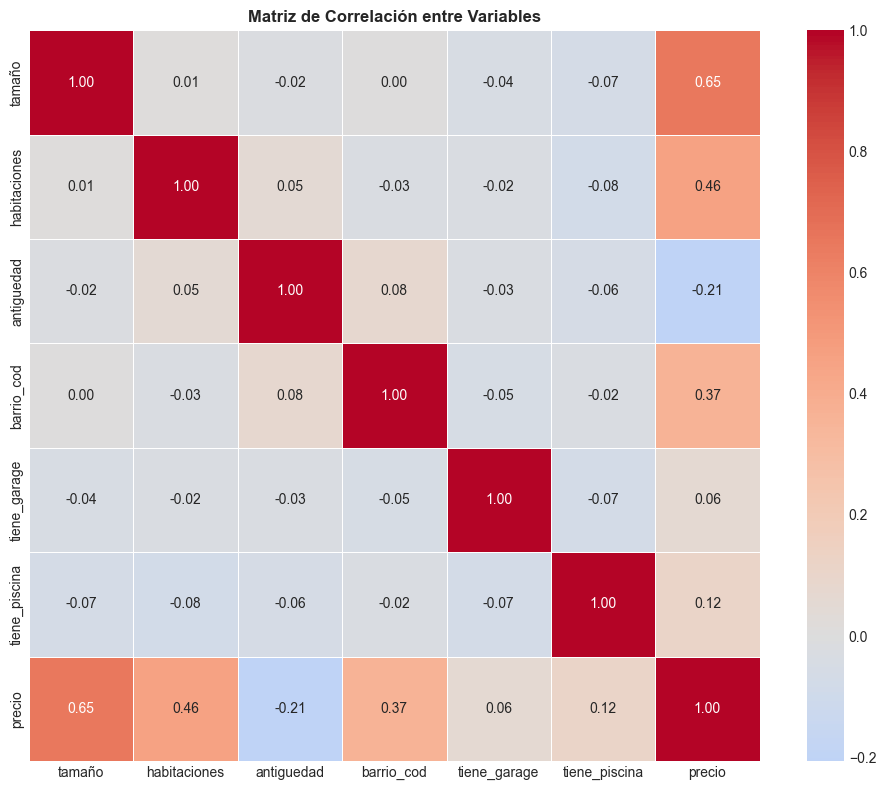

In [4]:
# 2. Matriz de correlación (¡MUY IMPORTANTE!)
# La matriz de correlación muestra la relación entre todas las variables numéricas
# Una correlación cercana a 1 o -1 indica una fuerte relación lineal
# Una correlación cercana a 0 indica poca o ninguna relación lineal
print("\n2. 🔗 MATRIZ DE CORRELACIÓN:")
correlation_matrix = datos.corr() # Calcular la matriz de correlación

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, fmt='.2f')
plt.title('Matriz de Correlación entre Variables', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

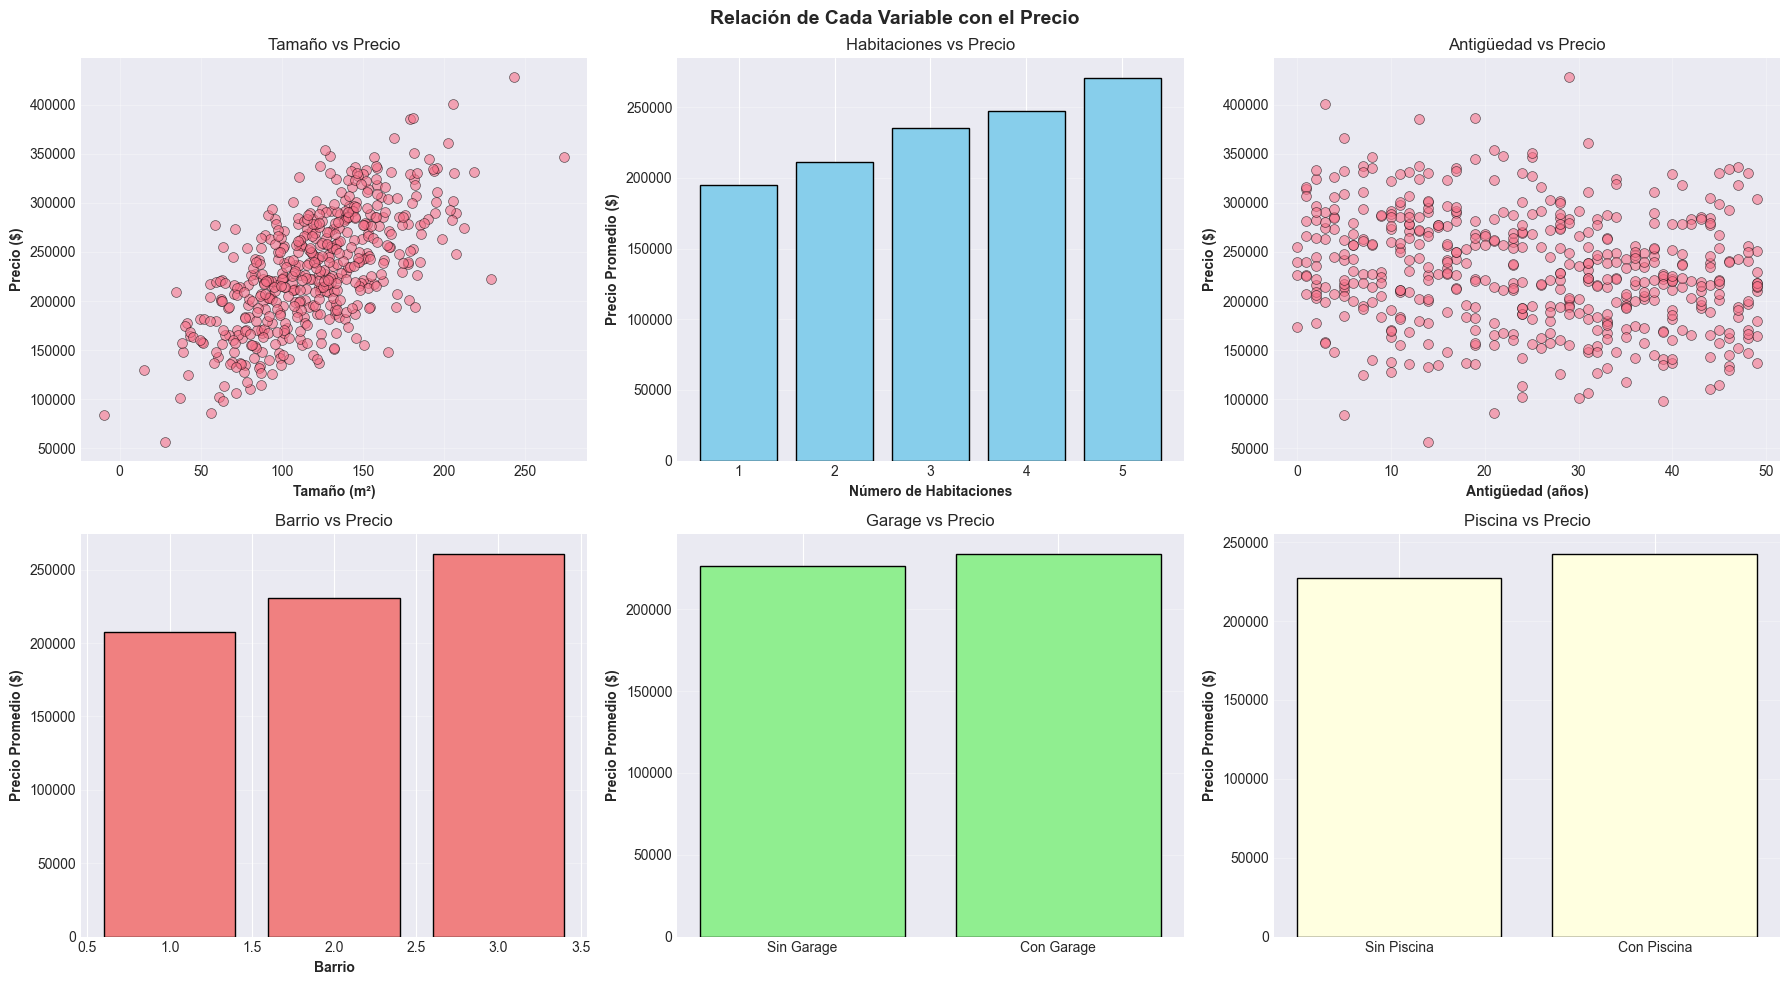

In [5]:
# 3. Visualizaciones múltiples

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Relación de Cada Variable con el Precio', fontsize=14, fontweight='bold')

# Tamaño vs Precio
axes[0, 0].scatter(datos['tamaño'], datos['precio'], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 0].set_xlabel('Tamaño (m²)', fontweight='bold')
axes[0, 0].set_ylabel('Precio ($)', fontweight='bold')
axes[0, 0].set_title('Tamaño vs Precio')
axes[0, 0].grid(True, alpha=0.3)

# Habitaciones vs Precio
habitaciones_agrupadas = datos.groupby('habitaciones')['precio'].mean()
axes[0, 1].bar(habitaciones_agrupadas.index, habitaciones_agrupadas.values, color='skyblue', edgecolor='black')
axes[0, 1].set_xlabel('Número de Habitaciones', fontweight='bold')
axes[0, 1].set_ylabel('Precio Promedio ($)', fontweight='bold')
axes[0, 1].set_title('Habitaciones vs Precio')
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Antigüedad vs Precio
axes[0, 2].scatter(datos['antiguedad'], datos['precio'], alpha=0.6, s=50, edgecolors='black', linewidth=0.5)
axes[0, 2].set_xlabel('Antigüedad (años)', fontweight='bold')
axes[0, 2].set_ylabel('Precio ($)', fontweight='bold')
axes[0, 2].set_title('Antigüedad vs Precio')
axes[0, 2].grid(True, alpha=0.3)

# Barrio vs Precio
barrio_agrupado = datos.groupby('barrio_cod')['precio'].mean()
axes[1, 0].bar(barrio_agrupado.index, barrio_agrupado.values, color='lightcoral', edgecolor='black')
axes[1, 0].set_xlabel('Barrio', fontweight='bold')
axes[1, 0].set_ylabel('Precio Promedio ($)', fontweight='bold')
axes[1, 0].set_title('Barrio vs Precio')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Garage vs Precio
garage_agrupado = datos.groupby('tiene_garage')['precio'].mean()
axes[1, 1].bar(['Sin Garage', 'Con Garage'], garage_agrupado.values, color='lightgreen', edgecolor='black')
axes[1, 1].set_ylabel('Precio Promedio ($)', fontweight='bold')
axes[1, 1].set_title('Garage vs Precio')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Piscina vs Precio
piscina_agrupado = datos.groupby('tiene_piscina')['precio'].mean()
axes[1, 2].bar(['Sin Piscina', 'Con Piscina'], piscina_agrupado.values, color='lightyellow', edgecolor='black')
axes[1, 2].set_ylabel('Precio Promedio ($)', fontweight='bold')
axes[1, 2].set_title('Piscina vs Precio')
axes[1, 2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Analizamos cómo se relaciona CADA variable con el precio individualmente.

### 🎯 ¿POR QUÉ ES IMPORTANTE?
- **Detectar relaciones**: Ver qué variables tienen más impacto
- **Identificar problemas**: Variables que no se relacionan con el target
- **Multicolinealidad**: Variables que están correlacionadas entre sí (problema)

### 🔍 PARA QUÉ SIRVE
Entender cuáles variables son importantes antes de construir el modelo.

---

## 3. 🏗️ PREPARACIÓN DE DATOS PARA MÚLTIPLES VARIABLES

In [ ]:
# PASO CRUCIAL: Preparar datos para múltiples variables

print("🎯 PREPARANDO DATOS PARA MÚLTIPLES VARIABLES\n")

# 1. Separar características (X) y target (y)
# X: Características independientes (todas menos 'precio')
# y: Variable dependiente (solo 'precio')
X = datos.drop('precio', axis=1)  # Todas las columnas excepto precio
y = datos['precio']  # Solo la columna precio

print(f"Características (X): {X.shape}") # Todas las variables excepto 'precio'
print(f"Target (y): {y.shape}") # Solo la variable 'precio'

# 2. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\n📊 DIVISIÓN:")
print(f"Entrenamiento: {X_train.shape[0]} muestras") # Número de muestras de entrenamiento
print(f"Prueba: {X_test.shape[0]} muestras") # Número de muestras de prueba

# 3. Estandarizar/normalizar variables (OPCIONAL pero recomendado)
scaler = StandardScaler() # Estandarización: media=0, desviación=1, lo que ayuda a modelos sensibles a la escala

X_train_scaled = scaler.fit_transform(X_train) # Ajustar y transformar los datos de entrenamiento
X_test_scaled = scaler.transform(X_test) # Transformar los datos de prueba

print(f"\n🔧 PREPROCESAMIENTO:")
print("Variables estandarizadas (media=0, desviación=1)")
print(f"Ejemplo de datos estandarizados: {X_train_scaled[0].round(2)}")

🎯 PREPARANDO DATOS PARA MÚLTIPLES VARIABLES

Características (X): (500, 6)
Target (y): (500,)

📊 DIVISIÓN:
Entrenamiento: 400 muestras
Prueba: 100 muestras
StandardScaler()

🔧 PREPROCESAMIENTO:
Variables estandarizadas (media=0, desviación=1)
Ejemplo de datos estandarizados: [ 0.41 -1.33 -0.27  1.34  0.66 -0.6 ]


### 📝 ¿QUÉ ESTAMOS HACIENDO?
Preparamos los datos específicamente para trabajar con múltiples variables.

### 🎯 ¿POR QUÉ ES DIFERENTE?
- **X ahora es una tabla**: No solo una columna
- **Estandarización**: Importante cuando variables tienen diferentes escalas
- **Manejo de variables categóricas**: Barrios necesitan tratamiento especial

### 🔍 PARA QUÉ SIRVE
Evitar que variables con valores grandes (como tamaño) dominen sobre variables con valores pequeños (como número de habitaciones).

---

## 4. 🧠 ENTRENAR MODELO CON MÚLTIPLES VARIABLES

In [8]:
# Entrenar modelo con múltiples variables

modelo_multi = LinearRegression()
modelo_multi.fit(X_train_scaled, y_train)

print("🎯 MODELO CON MÚLTIPLES VARIABLES ENTRENADO")

# Mostrar los coeficientes (importancia de cada variable)
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo_multi.coef_,
    'Impacto_Absoluto': np.abs(modelo_multi.coef_)
}).sort_values('Impacto_Absoluto', ascending=False) # Ordenar por impacto absoluto

print("\n📊 IMPORTANCIA DE CADA VARIABLE:")
print(coeficientes.to_string(index=False)) # Mostrar sin índice

# Interpretación sencilla
print("\n💡 INTERPRETACIÓN SENCILLA:")
print("POSITIVO: Cuando la variable AUMENTA, el precio AUMENTA")
print("NEGATIVO: Cuando la variable AUMENTA, el precio DISMINUYE")
print("VALOR ABSOLUTO: Qué tan fuerte es el efecto")

🎯 MODELO CON MÚLTIPLES VARIABLES ENTRENADO

📊 IMPORTANCIA DE CADA VARIABLE:
     Variable   Coeficiente  Impacto_Absoluto
       tamaño  37499.538855      37499.538855
 habitaciones  29608.869874      29608.869874
   barrio_cod  23764.483824      23764.483824
   antiguedad -13550.834521      13550.834521
tiene_piscina  10828.559225      10828.559225
 tiene_garage   7309.769063       7309.769063

💡 INTERPRETACIÓN SENCILLA:
POSITIVO: Cuando la variable AUMENTA, el precio AUMENTA
NEGATIVO: Cuando la variable AUMENTA, el precio DISMINUYE
VALOR ABSOLUTO: Qué tan fuerte es el efecto


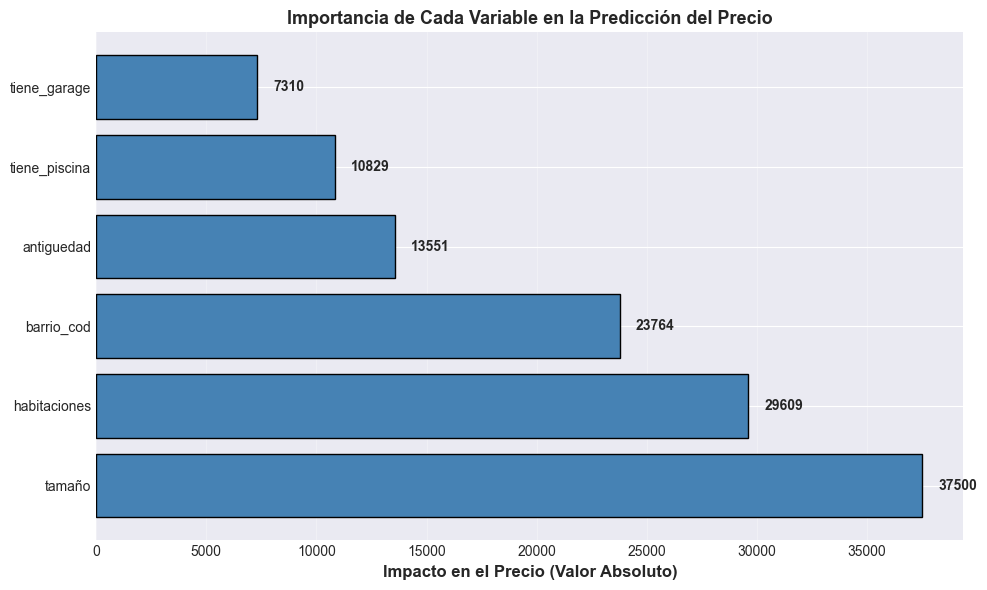

In [9]:
# Visualizar importancia de variables

plt.figure(figsize=(10, 6))
bars = plt.barh(coeficientes['Variable'], coeficientes['Impacto_Absoluto'], 
                 color='steelblue', edgecolor='black')
plt.xlabel('Impacto en el Precio (Valor Absoluto)', fontsize=12, fontweight='bold')
plt.title('Importancia de Cada Variable en la Predicción del Precio', 
          fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3, axis='x')

# Añadir valores en las barras
for i, (bar, val) in enumerate(zip(bars, coeficientes['Impacto_Absoluto'])):
    plt.text(val + max(coeficientes['Impacto_Absoluto'])*0.02, bar.get_y() + bar.get_height()/2,
             f'{val:.0f}', ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Entrenamos un modelo que considera TODAS las variables simultáneamente.

### 🎯 ¿CÓMO FUNCIONA?
El modelo aprende una fórmula como:

```
Precio = (coef1 × tamaño) + (coef2 × habitaciones) + ... + intercepto
```

### 🔍 PARA QUÉ SIRVE
Cada coeficiente nos dice cuánto afecta cada variable al precio, manteniendo las otras constantes.

---

## 5. 📈 EVALUAR MODELO CON MÚLTIPLES VARIABLES

In [10]:
# Evaluar el modelo múltiple

y_pred_multi = modelo_multi.predict(X_test_scaled)

# Métricas
mse_multi = mean_squared_error(y_test, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test, y_pred_multi)

print("📊 EVALUACIÓN DEL MODELO MÚLTIPLE:")
print(f"Error Cuadrático Medio (MSE): {mse_multi:,.0f}€")
print(f"Raíz del Error Cuadrático (RMSE): {rmse_multi:,.0f}€")
print(f"Coeficiente R²: {r2_multi:.3f}")

# Comparar con modelo simple (solo tamaño)
modelo_simple = LinearRegression()
modelo_simple.fit(X_train[['tamaño']], y_train)
y_pred_simple = modelo_simple.predict(X_test[['tamaño']])
r2_simple = r2_score(y_test, y_pred_simple)

print(f"\n🔍 COMPARACIÓN:")
print(f"R² con solo TAMAÑO: {r2_simple:.3f}")
print(f"R² con TODAS las variables: {r2_multi:.3f}")
print(f"Mejora: {r2_multi - r2_simple:.3f}")

📊 EVALUACIÓN DEL MODELO MÚLTIPLE:
Error Cuadrático Medio (MSE): 413,439,482€
Raíz del Error Cuadrático (RMSE): 20,333€
Coeficiente R²: 0.875

🔍 COMPARACIÓN:
R² con solo TAMAÑO: 0.452
R² con TODAS las variables: 0.875
Mejora: 0.423


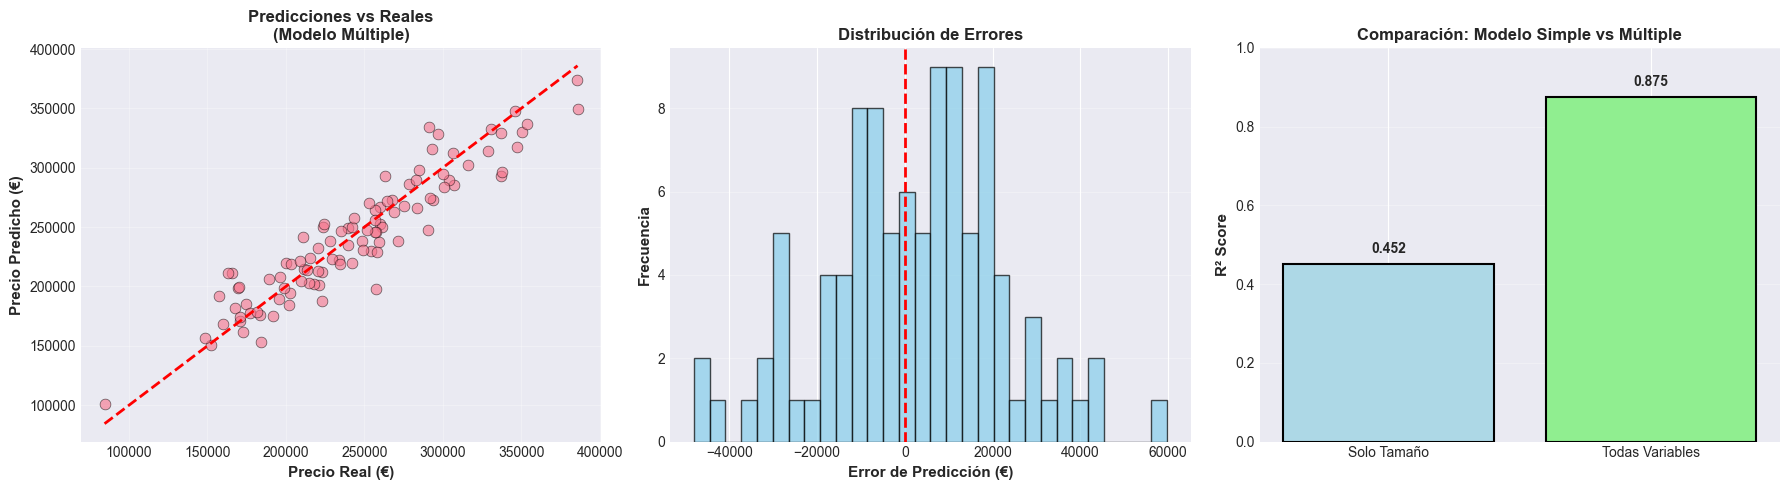

In [11]:
# Visualizar comparación de modelos

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Predicciones vs Reales
axes[0].scatter(y_test, y_pred_multi, alpha=0.6, s=60, edgecolors='black', linewidth=0.5)
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0].set_xlabel('Precio Real (€)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Precio Predicho (€)', fontsize=11, fontweight='bold')
axes[0].set_title('Predicciones vs Reales\n(Modelo Múltiple)', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Errores
errores = y_test - y_pred_multi
axes[1].hist(errores, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2)
axes[1].set_xlabel('Error de Predicción (€)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frecuencia', fontsize=11, fontweight='bold')
axes[1].set_title('Distribución de Errores', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

# Comparación modelos
modelos = ['Solo Tamaño', 'Todas Variables']
r2_scores = [r2_simple, r2_multi]
bars = axes[2].bar(modelos, r2_scores, color=['lightblue', 'lightgreen'], edgecolor='black', linewidth=1.5)
axes[2].set_ylabel('R² Score', fontsize=11, fontweight='bold')
axes[2].set_title('Comparación: Modelo Simple vs Múltiple', fontsize=12, fontweight='bold')
axes[2].set_ylim([0, 1])
axes[2].grid(True, alpha=0.3, axis='y')

# Añadir valores en las barras
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    axes[2].text(bar.get_x() + bar.get_width()/2, height + 0.02,
                f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Evaluamos si agregar más variables realmente mejora el modelo.

### 🎯 ¿CÓMO SABEMOS SI ES MEJOR?
- **R² más alto**: Explica más variación en los datos
- **Errores más pequeños**: Predicciones más precisas
- **Errores aleatorios**: Sin patrones sistemáticos

### 🔍 PARA QUÉ SIRVE
Confirmar que las variables adicionales aportan valor real al modelo.

---

## 6. 🚨 PELIGROS CON MÚLTIPLES VARIABLES

In [12]:
# PELIGRO 1: Overfitting (modelo demasiado complejo)

print("🚨 PELIGROS CON MÚLTIPLES VARIABLES\n")

# Crear variables irrelevantes (ruido)
X_train_con_ruido = X_train.copy() # Añadir variables de ruido
X_test_con_ruido = X_test.copy() # Añadir variables de ruido

for i in range(5):  # Añadir 5 variables de ruido
    X_train_con_ruido[f'ruido_{i}'] = np.random.normal(0, 1, len(X_train))
    X_test_con_ruido[f'ruido_{i}'] = np.random.normal(0, 1, len(X_test))

# Entrenar modelo con variables irrelevantes
modelo_con_ruido = LinearRegression()
modelo_con_ruido.fit(X_train_con_ruido, y_train)

# Evaluar
train_score_ruido = modelo_con_ruido.score(X_train_con_ruido, y_train)
test_score_ruido = modelo_con_ruido.score(X_test_con_ruido, y_test)

print("🔍 PELIGRO 1: OVERFITTING")
print(f"R² Entrenamiento (con ruido): {train_score_ruido:.3f}")
print(f"R² Prueba (con ruido): {test_score_ruido:.3f}")
print(f"R² Prueba (sin ruido): {r2_multi:.3f}")

if test_score_ruido < r2_multi:
    print("✅ CONCLUSIÓN: Variables irrelevantes empeoran el modelo")

🚨 PELIGROS CON MÚLTIPLES VARIABLES

🔍 PELIGRO 1: OVERFITTING
R² Entrenamiento (con ruido): 0.890
R² Prueba (con ruido): 0.872
R² Prueba (sin ruido): 0.875
✅ CONCLUSIÓN: Variables irrelevantes empeoran el modelo


Análisis Detallado

Con ruido (entrenamiento)	0.890	El modelo memoriza muy bien los datos (incluyendo el ruido)

Con ruido (prueba)	0.872	En datos nuevos: PEOR que sin ruido

Sin ruido (prueba)	0.875	El modelo original sin variables inútiles funciona mejor

⚠️ ¿Por Qué Es un Problema?

Al añadir 5 variables completamente aleatorias (ruido puro)
El modelo las "aprende" porque ve correlaciones falsas en el entrenamiento.

En prueba: esas correlaciones falsas NO se repiten.

Resultado: El modelo generaliza peor, no mejor.

🎯 Conclusión 
"Agregar variables irrelevantes no solo no ayuda... ¡perjudica!"

✅ Modelo original: R² = 0.875
❌ Modelo con ruido: R² = 0.872
📉 Pérdida de 0.3% en precisión

🚀 La Lección

Más variables ≠ Mejor modelo

Cada variable innecesaria es un riesgo de overfitting

In [13]:
# PELIGRO 2: Multicolinealidad

print("\n🔍 PELIGRO 2: MULTICOLINEALIDAD")
print("Ocurre cuando variables están muy correlacionadas entre sí\n")

# Crear ejemplo de multicolinealidad
datos_multicol = datos.copy()
datos_multicol['tamaño_habitaciones'] = datos_multicol['tamaño'] * datos_multicol['habitaciones']  # Variable redundante

corr_alta = datos_multicol[['tamaño', 'tamaño_habitaciones']].corr().iloc[0, 1]
print(f"Correlación entre tamaño y tamaño_habitaciones: {corr_alta:.3f}")

if corr_alta > 0.8:
    print("🚨 ALTA CORRELACIÓN: Puede causar problemas en el modelo")


🔍 PELIGRO 2: MULTICOLINEALIDAD
Ocurre cuando variables están muy correlacionadas entre sí

Correlación entre tamaño y tamaño_habitaciones: 0.549


**Correlación 0.549 significa:**

├─ Las variables comparten el 55% de su variabilidad

├─ El otro 45% es DIFERENTE e INESPERADO

└─ Son variables RELACIONADAS pero NO REDUNDANTES

**Correlación 0.1**   → Sin relación (variables independientes) ✅

**Correlación 0.5**   → Relación moderada (aceptable)         ✅

**Correlación 0.8**   → Relación muy alta (problema)          ❌

**Correlación 0.95**  → Casi idénticas (redundancia total)    ❌❌

**¿Cuándo SERÍA un Problema?**

Si la correlación fuera > 0.8:

Las variables estarían muy redundantes, y el modelo tendría dificultad para estimar coeficientes. Los coeficientes serían inestables e ininterpretables.

Agregar una sola variable cambiaría drásticamente los otros coeficientes

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Mostramos los riesgos de trabajar con muchas variables.

### 🎯 PELIGROS COMUNES:
- **Overfitting**: Modelo memoriza el ruido en lugar de aprender patrones
- **Multicolinealidad**: Variables redundantes que confunden al modelo
- **Complejidad innecesaria**: Más variables no siempre es mejor

### 🔍 PARA QUÉ SIRVE
Aprender a reconocer cuándo estamos agregando variables que perjudican el modelo.

---

## 7. 🎯 SELECCIÓN DE VARIABLES INTELIGENTE

In [ ]:
# Técnica: Seleccionar solo las variables importantes

print("🎯 SELECCIÓN INTELIGENTE DE VARIABLES\n")

# Método 1: Usar los coeficientes del modelo
variables_importantes = coeficientes[coeficientes['Impacto_Absoluto'] > coeficientes['Impacto_Absoluto'].median()]['Variable'].tolist()

print(f"Variables seleccionadas por importancia: {variables_importantes}\n")

# Entrenar modelo solo con variables importantes
X_train_sel = X_train[variables_importantes]
X_test_sel = X_test[variables_importantes]

modelo_seleccionado = LinearRegression()
modelo_seleccionado.fit(X_train_sel, y_train)

r2_seleccionado = modelo_seleccionado.score(X_test_sel, y_test)

print(f"📊 COMPARACIÓN FINAL:")
print(f"R² con TODAS las variables: {r2_multi:.3f}")
print(f"R² con variables SELECCIONADAS: {r2_seleccionado:.3f}")
print(f"Diferencia: {abs(r2_multi - r2_seleccionado):.3f}")

**📋 ¿Qué sucedió?**
1. Variables Seleccionadas: ['tamaño', 'habitaciones', 'barrio_cod']

El algoritmo identificó que estas 3 variables tienen el mayor impacto absoluto en el modelo.

Se seleccionaron aquellas con un "Impacto_Absoluto" superior a la mediana del conjunto completo.

Esto significa que sus coeficientes tienen valores absolutos más grandes (positivos o negativos).

2. Comparación Final de R²:

R² con TODAS las variables: 0.875 → El modelo usa todas las features disponibles.

R² con variables SELECCIONADAS: 0.714 → El modelo simplificado usa solo 3 variables.

Diferencia: 0.161 → La pérdida de rendimiento es del 16.1%.

In [ ]:
# Método 2: Usar correlación con el target

correlacion_con_target = datos.corr()['precio'].abs().sort_values(ascending=False)
variables_correlacionadas = correlacion_con_target[correlacion_con_target > 0.1].index.tolist()

if 'precio' in variables_correlacionadas:
    variables_correlacionadas.remove('precio')  # Quitar el target

print(f"\n🔗 Variables con buena correlación con el precio:")
for var, corr in correlacion_con_target[1:].items():  # Saltar 'precio'
    print(f"  {var}: {corr:.3f}")

## 📊 Análisis de Correlaciones con el Precio

Esta celda calcula cuánto se relaciona cada variable independiente con el **precio** (nuestro objetivo de predicción).

### 🔢 Interpretación de cada correlación:

| Variable | Correlación | Interpretación |
|----------|-------------|---|
| **tamaño** | 0.654 | ✅ **Muy fuerte** - Es el factor MÁS importante |
| **habitaciones** | 0.459 | ✅ **Moderada-Fuerte** - Bastante relevante |
| **barrio_cod** | 0.367 | ⚠️ **Moderada** - Tiene impacto, pero menos |
| **antiguedad** | 0.206 | ⚠️ **Débil** - Poco impacto |
| **tiene_piscina** | 0.118 | ❌ **Muy débil** - Casi sin efecto |
| **tiene_garage** | 0.062 | ❌ **Muy débil** - Casi sin efecto |

### 📈 ¿Qué significan estos números?

- **0.654** = El tamaño explica el **65.4%** de la variación en el precio
  - Cuando aumenta el tamaño, el precio CASI SIEMPRE aumenta
  - Es la variable **más predadora del precio**

- **0.459** = Las habitaciones explican el **45.9%** de la variación
  - Fuerte relación, pero menos que el tamaño
  - Más habitaciones = precio más alto (generalmente)

- **0.367** = El barrio explica el **36.7%** de la variación
  - Barrios más "caros" tienen precios más altos
  - Pero hay mucha variabilidad dentro de cada barrio

- **0.206** = La antigüedad explica solo el **20.6%**
  - Relación débil: casas viejas y nuevas pueden tener precios similares

- **0.118 y 0.062** = Garage y piscina casi no afectan
  - Apenas influyen en el precio final
  - Podrían ser variables "inútiles" para la predicción

### 🎯 Relación con la Selección de Variables

Recuerda los resultados anteriores:



In [ ]:
Variables seleccionadas por importancia: ['tamaño', 'habitaciones', 'barrio_cod']



¿Por qué se seleccionaron estas 3? **¡Mira la correlación!**

- ✅ **tamaño** (0.654) → Correlación más alta
- ✅ **habitaciones** (0.459) → Segunda más alta
- ✅ **barrio_cod** (0.367) → Tercera más alta
- ❌ **antiguedad** (0.206) → Mucho más débil
- ❌ **tiene_piscina** (0.118) → Casi irrelevante
- ❌ **tiene_garage** (0.062) → Casi irrelevante

### 💡 Conclusión Práctica



In [ ]:
🏆 TOP 3 variables que explican el precio:
1. Tamaño (65.4%) ← El factor MÁS importante
2. Habitaciones (45.9%) ← Factor muy importante
3. Barrio (36.7%) ← Factor moderadamente importante

📉 Variables de bajo impacto:
• Antigüedad, piscina y garage → Añaden poco valor predictivo



**Por eso el modelo simplificado con solo 3 variables pierde solo 16.1% de precisión (de 0.875 a 0.714)**: estamos eliminando variables que casi no correlacionan con el precio 🎯

In [ ]:
# Visualizar selección

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Importancia por coeficientes
coef_importantes = coeficientes[coeficientes['Variable'].isin(variables_importantes)]
bars1 = axes[0].barh(coef_importantes['Variable'], coef_importantes['Impacto_Absoluto'], 
                      color='steelblue', edgecolor='black')
axes[0].set_xlabel('Impacto Absoluto', fontsize=11, fontweight='bold')
axes[0].set_title('Variables Seleccionadas por Impacto', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='x')

# Correlación con target
correlaciones = correlacion_con_target[1:]  # Saltar 'precio'
bars2 = axes[1].barh(correlaciones.index, correlaciones.values, 
                      color='coral', edgecolor='black')
axes[1].set_xlabel('Correlación Absoluta con Precio', fontsize=11, fontweight='bold')
axes[1].set_title('Variables por Correlación con Target', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Seleccionamos solo las variables que realmente aportan valor.

### 🎯 ¿POR QUÉ SELECCIONAR VARIABLES?
- **Modelos más simples**: Más fáciles de entender y mantener
- **Menos overfitting**: Menos probabilidad de memorizar ruido
- **Más rápido**: Menos variables = menos cómputo necesario
- **Más robusto**: Generaliza mejor a nuevos datos

### 🔍 PARA QUÉ SIRVE
Encontrar el balance perfecto entre simplicidad y poder predictivo.

---

## 8. 🧪 EJEMPLO PRÁCTICO: PREDECIR CON NUEVOS DATOS

In [ ]:
# Predicción con nuevos datos

print("🧪 PREDICCIÓN CON NUEVOS DATOS\n")

# Crear una nueva casa
nueva_casa = pd.DataFrame({
    'tamaño': [180],
    'habitaciones': [4],
    'antiguedad': [5],
    'barrio_cod': [2],
    'tiene_garage': [1],
    'tiene_piscina': [0]
})

print("🏠 CARACTERÍSTICAS DE LA NUEVA CASA:")
for col, val in nueva_casa.iloc[0].items():
    print(f"   {col}: {val}")

# Preprocesar igual que los datos de entrenamiento
nueva_casa_scaled = scaler.transform(nueva_casa)

# Hacer predicción
precio_predicho = modelo_multi.predict(nueva_casa_scaled)[0]

print(f"\n💰 PRECIO PREDICHO: {precio_predicho:,.0f}€")

In [ ]:
# Mostrar contribución de cada variable

contribuciones = modelo_multi.coef_ * nueva_casa_scaled[0]
contribucion_df = pd.DataFrame({
    'Variable': X.columns,
    'Contribución': contribuciones
}).sort_values('Contribución', key=abs, ascending=False)

print("\n📊 CONTRIBUCIÓN DE CADA VARIABLE AL PRECIO:")
for _, row in contribucion_df.iterrows():
    signo = "+" if row['Contribución'] > 0 else ""
    print(f"   {row['Variable']:20s}: {signo}€{row['Contribución']:>10,.0f}")

print(f"\n   {'Precio base':20s}:  €{modelo_multi.intercept_:>10,.0f}")
print(f"   {'─' * 40}")
print(f"   {'TOTAL':20s}:  €{precio_predicho:>10,.0f}")

### 📝 ¿QUÉ ESTAMOS HACIENDO?
Usamos el modelo entrenado para predecir el precio de una casa nueva.

### 🎯 ¿CÓMO INTERPRETAR?
Cada variable contribuye positivamente o negativamente al precio final.

### 🔍 PARA QUÉ SIRVE
Entender no solo EL PRECIO, sino POR QUÉ el modelo da ese precio.

---

## 9. 📋 RESUMEN: FLUJO DE TRABAJO CON MÚLTIPLES VARIABLES

### 1. 🔍 ANÁLISIS EXPLORATORIO
- **Qué**: Estudiar cada variable individualmente
- **Por qué**: Entender relaciones y detectar problemas
- **Para qué**: Seleccionar variables prometedoras

### 2. 🏗️ PREPARACIÓN DE DATOS
- **Qué**: Estandarizar y dividir datos
- **Por qué**: Variables en diferentes escalas pueden distorsionar el modelo
- **Para qué**: Entrenamiento más estable y eficiente

### 3. 🧠 ENTRENAMIENTO DEL MODELO
- **Qué**: Entrenar con todas las variables
- **Por qué**: Ver el poder predictivo máximo
- **Para qué**: Establecer línea base de rendimiento

### 4. 📈 EVALUACIÓN Y ANÁLISIS
- **Qué**: Analizar coeficientes y rendimiento
- **Por qué**: Identificar variables importantes
- **Para qué**: Tomar decisiones informadas sobre qué variables mantener

### 5. 🎯 SELECCIÓN DE VARIABLES
- **Qué**: Elegir solo las variables más importantes
- **Por qué**: Evitar overfitting y simplificar el modelo
- **Para qué**: Modelo más robusto y interpretable

### 6. 🚀 MODELO FINAL
- **Qué**: Entrenar modelo final con variables seleccionadas
- **Por qué**: Balance óptimo entre simplicidad y poder predictivo
- **Para qué**: Implementación en producción

### 💡 REGLA DE ORO:
**"Empieza simple, añade complejidad solo si mejora significativamente el modelo"**

---

## 10. 🏆 CONCLUSIÓN FINAL

In [ ]:
# Resumen visual del proceso

print("🎉 ¡PROCESO COMPLETADO!\n")

# Crear resumen visual
fig, ax = plt.subplots(figsize=(14, 8))

etapas = [
    "1. Análisis Exploratorio\n(Entender datos)",
    "2. Preparación de Datos\n(Estandarizar, dividir)",
    "3. Entrenamiento Modelo\n(Todas las variables)",
    "4. Evaluación y Análisis\n(Coeficientes, métricas)",
    "5. Selección Variables\n(Mantener solo importantes)",
    "6. Modelo Final\n(Optimizado y simple)"
]

colores = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEAA7', '#DDA0DD']

for i, (etapa, color) in enumerate(zip(etapas, colores)):
    y_pos = len(etapas) - i
    ax.barh(y_pos, 1, color=color, alpha=0.8, edgecolor='black', linewidth=2, height=0.6)
    ax.text(0.5, y_pos, etapa, ha='center', va='center',
            fontweight='bold', fontsize=12)

ax.set_xlim(0, 1)
ax.set_ylim(0, len(etapas) + 1)
ax.set_title('🚀 FLUJO DE TRABAJO CON MÚLTIPLES VARIABLES',
            fontsize=16, fontweight='bold', pad=20)
ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print("""✅ LO QUE APRENDIMOS HOY:

🔍 ANÁLISIS:
   • Cómo explorar múltiples variables
   • Matrices de correlación
   • Identificar relaciones

🏗️ CONSTRUCCIÓN:
   • Preparar datos para múltiples variables
   • Estandarización importante
   • Entrenar modelos múltiples

📊 EVALUACIÓN:
   • Interpretar coeficientes
   • Identificar variables importantes
   • Detectar overfitting

🎯 OPTIMIZACIÓN:
   • Selección inteligente de variables
   • Balance simplicidad-poder predictivo
   • Modelos más robustos

💡 RECUERDA SIEMPRE:
   "Más variables no siempre es mejor"
   "La simplicidad es la máxima sofisticación"
   "Siempre pregunta: ¿Esta variable realmente ayuda?"
""")